In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy import ndimage
from shapely.wkt import loads
import matplotlib.pylab as pylab
import warnings
import libpysal as ps
#warnings.filterwarnings("ignore")
#pylab.rcParams['figure.figsize'] = 13,7

# Step 1: Prepare Trat Map at Tambon level

## Step 1.1: Prepare base map

Observations, Attributes - District: (7, 12)
Observations, Attributes - District: (38, 15)
   Shape_Leng  Shape_Area      ADM2_EN    ADM2_TH ADM2_PCODE ADM1_EN ADM1_TH  \
0    2.561116    0.078835  Mueang Trat  เมืองตราด     TH2301    Trat    ตราด   

  ADM1_PCODE   ADM0_EN    ADM0_TH ADM0_PCODE  \
0       TH23  Thailand  ประเทศไทย         TH   

                                            geometry  
0  POLYGON ((102.57287 12.46819, 102.57296 12.468...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Shape_Leng  7 non-null      float64 
 1   Shape_Area  7 non-null      float64 
 2   ADM2_EN     7 non-null      object  
 3   ADM2_TH     7 non-null      object  
 4   ADM2_PCODE  7 non-null      object  
 5   ADM1_EN     7 non-null      object  
 6   ADM1_TH     7 non-null      object  
 7   ADM1_PCODE  7 non-null      object  
 8   ADM0_EN

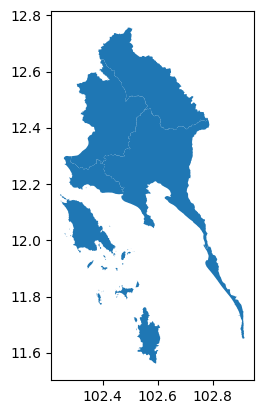

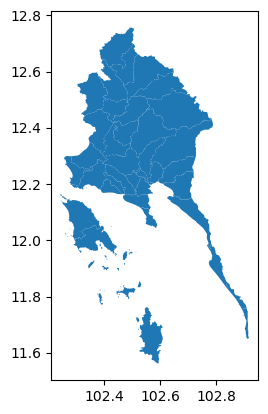

In [7]:
DistrictMap = gpd.GeoDataFrame.from_file("Map/Trat/District/Trat.shx")
TambolMap =gpd.GeoDataFrame.from_file("Map/Trat/Tambol/Trat.shx")
print("Observations, Attributes - District:", DistrictMap.shape)
print("Observations, Attributes - District:", TambolMap.shape)
print(DistrictMap.head(1))
DistrictMap.plot()
TambolMap.plot()
print(DistrictMap.info())
print(TambolMap.info())

In [14]:
l=[*range(1,20)]
print(l)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [17]:
SampleDistrictData = pd.Series([*range(1,DistrictMap.shape[0]+1)])
SampleTambolData = pd.Series([*range(1,TambolMap.shape[0]+1)])
DistrictMap=DistrictMap.assign(Example=SampleDistrictData)
TambolMap=TambolMap.assign(Example=SampleTambolData)

## Step 1.2: Center of district

/var/folders/fr/mx56f485093cg1yjr5j60t840000gn/T/ipykernel_18576/2520370042.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  DistrictMap['centroid_column'] = DistrictMap.centroid


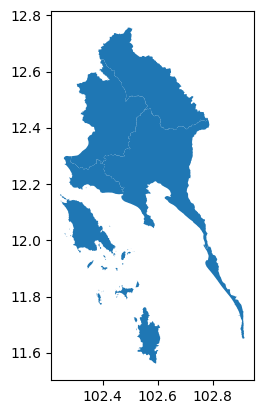

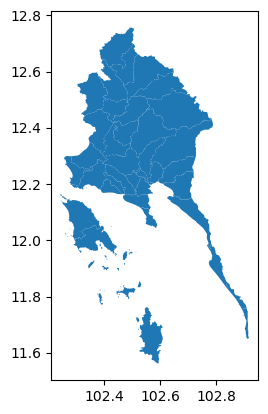

In [20]:
DistrictMap['centroid_column'] = DistrictMap.centroid
DistrictMap_center = DistrictMap.set_geometry('centroid_column')
TambolMap['centroid_column'] = TambolMap.centroid
TambolMap_center = TambolMap.set_geometry('centroid_column')
DistrictMap.plot();
TambolMap.plot();

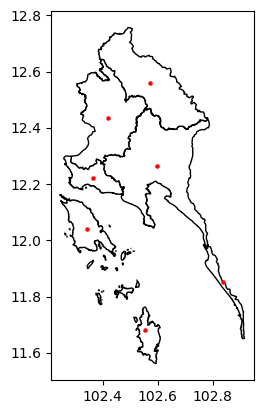

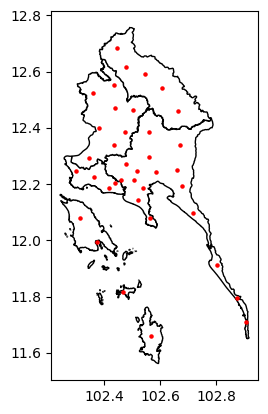

In [23]:
basemap_District = DistrictMap.plot(color='white', edgecolor='black')
DistrictMap_center.plot(ax=basemap_District, marker='o', color='red', markersize=5);
#cities.plot(ax=basemap, marker='o', color='red', markersize=5);
basemap_Tambol = DistrictMap.plot(color='white', edgecolor='black')
TambolMap_center.plot(ax=basemap_Tambol, marker='o', color='red', markersize=5);


# Step 2: load population data

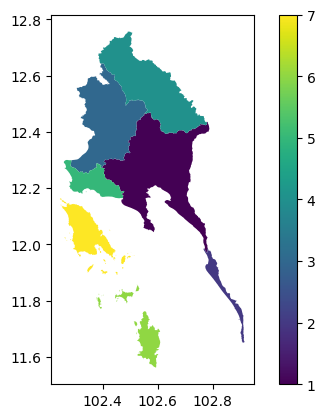

In [28]:
DistrictMap.plot(column='Example', legend=True);

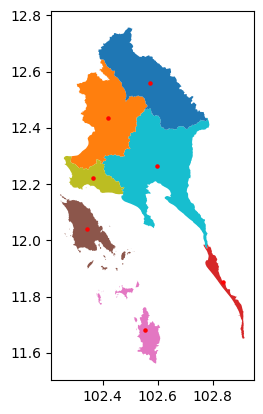

In [23]:
#2.1 Colorful map by Amphoe and district
basemap = trat.plot(column='ADM2_EN')
trat_center.plot(ax=basemap, marker='o', color='red', markersize=5);
#trat.plot(column='ADM3_EN')

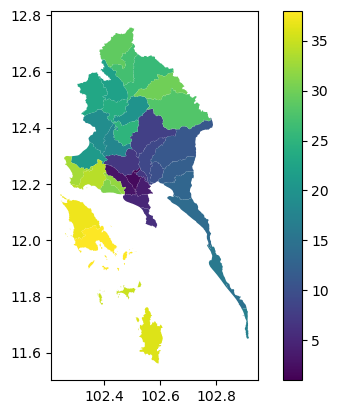

In [25]:
TambolMap.plot(column='Example', legend=True);

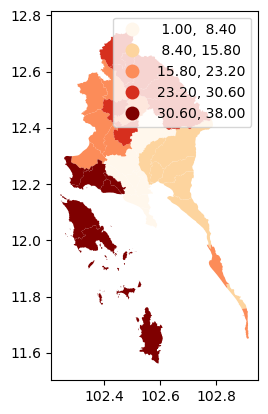

In [27]:
TambolMap.plot(column='Example', cmap='OrRd', scheme='quantiles', legend=True);